In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
dataset=pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
dataset.shape

(8124, 23)

In [8]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [10]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [15]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

# ANN

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
classifier = Sequential()

In [18]:
classifier.add(Dense(8, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
569/569 [==============================] - 1s 575us/step - loss: 0.6311 - accuracy: 0.5903
Epoch 2/100
569/569 [==============================] - 0s 537us/step - loss: 0.2936 - accuracy: 0.9064
Epoch 3/100
569/569 [==============================] - 0s 520us/step - loss: 0.2756 - accuracy: 0.9120
Epoch 4/100
569/569 [==============================] - 0s 517us/step - loss: 0.2851 - accuracy: 0.9064
Epoch 5/100
569/569 [==============================] - 0s 524us/step - loss: 0.2755 - accuracy: 0.9091
Epoch 6/100
569/569 [==============================] - 0s 534us/step - loss: 0.2641 - accuracy: 0.9132
Epoch 7/100
569/569 [==============================] - 0s 524us/step - loss: 0.2783 - accuracy: 0.9041
Epoch 8/100
569/569 [==============================] - 0s 526us/step - loss: 0.2599 - accuracy: 0.9116
Epoch 9/100
569/569 [==============================] - 0s 580us/step - loss: 0.2583 - accuracy: 0.9105
Epoch 10/100
569/569 [==============================] - 0s 541us/step - l

569/569 [==============================] - 0s 543us/step - loss: 0.1927 - accuracy: 0.9357
Epoch 80/100
569/569 [==============================] - 0s 515us/step - loss: 0.2044 - accuracy: 0.9302
Epoch 81/100
569/569 [==============================] - 0s 556us/step - loss: 0.1987 - accuracy: 0.9326
Epoch 82/100
569/569 [==============================] - 0s 524us/step - loss: 0.2072 - accuracy: 0.9296
Epoch 83/100
569/569 [==============================] - 1s 912us/step - loss: 0.2000 - accuracy: 0.9299
Epoch 84/100
569/569 [==============================] - 0s 581us/step - loss: 0.2006 - accuracy: 0.9336
Epoch 85/100
569/569 [==============================] - 0s 508us/step - loss: 0.2069 - accuracy: 0.9253
Epoch 86/100
569/569 [==============================] - 0s 527us/step - loss: 0.2046 - accuracy: 0.9264
Epoch 87/100
569/569 [==============================] - 0s 554us/step - loss: 0.2040 - accuracy: 0.9274
Epoch 88/100
569/569 [==============================] - 0s 505us/step - loss:

In [20]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[1216   41]
 [ 132 1049]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1257
           1       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


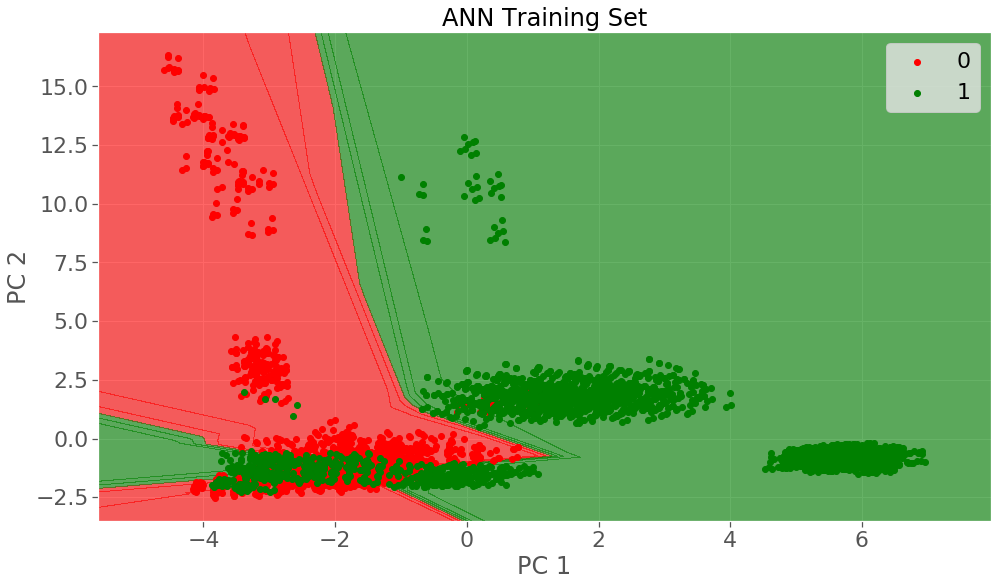

In [23]:
visualization_train(model='ANN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


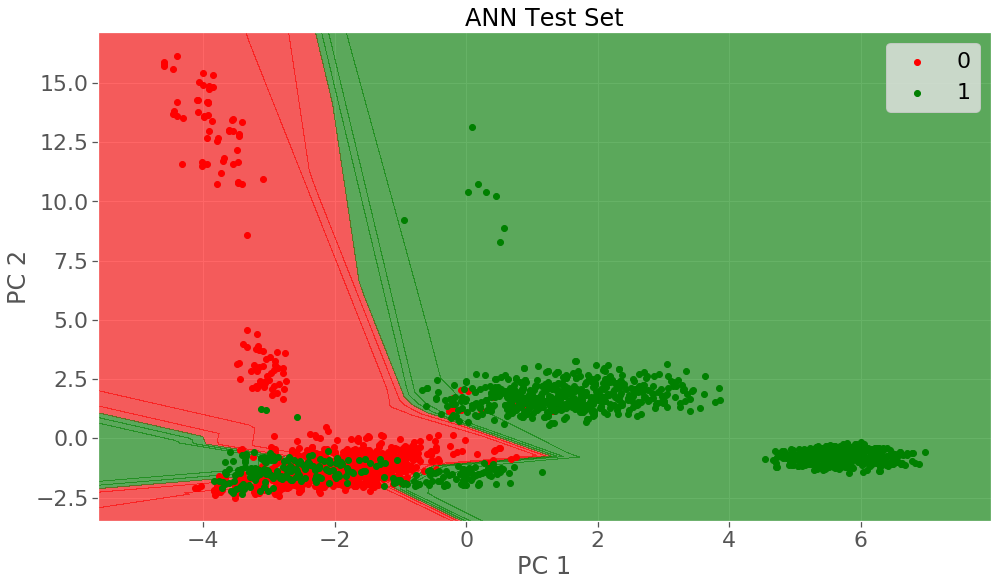

In [24]:
visualization_test(model='ANN')

In [25]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [26]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0098


In [29]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


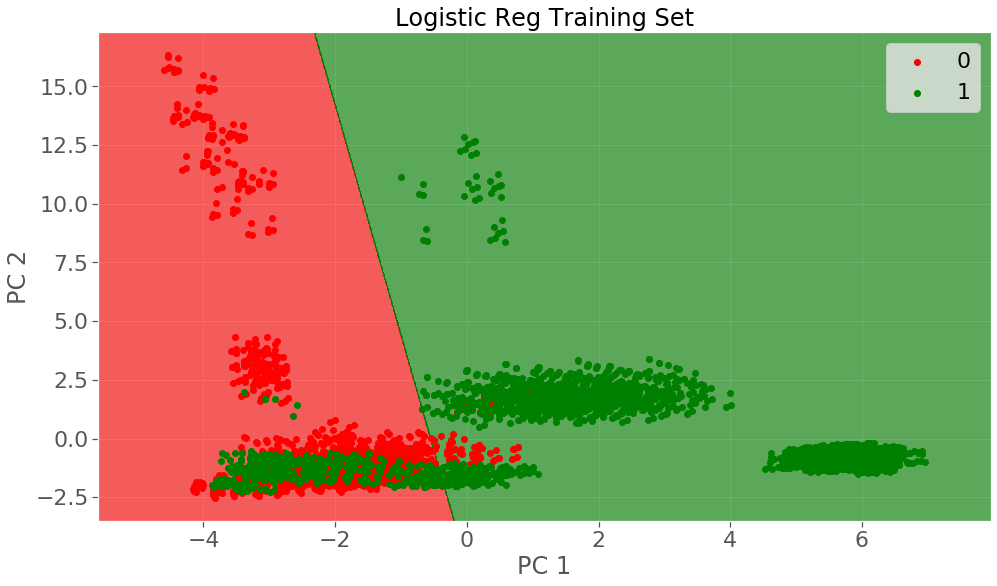

In [30]:
visualization_train('Logistic Reg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


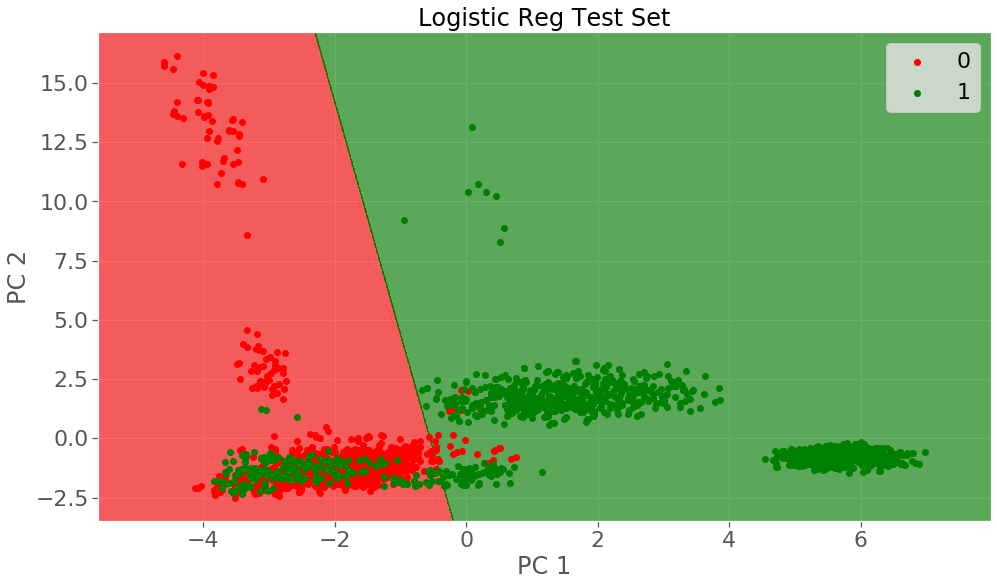

In [31]:
visualization_test('Logistic Reg')

# SVC

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

In [33]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9140

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2951
           1       0.97      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.92      0.91      0.91      5686
weighted avg       0.92      0.91      0.91      5686


Confusion Matrix:
[[2886   65]
 [ 424 2311]]

Average Accuracy:	0.9136

Standard Deviation:	0.0090


In [34]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9085

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1257
           1       0.97      0.83      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1231   26]
 [ 197  984]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


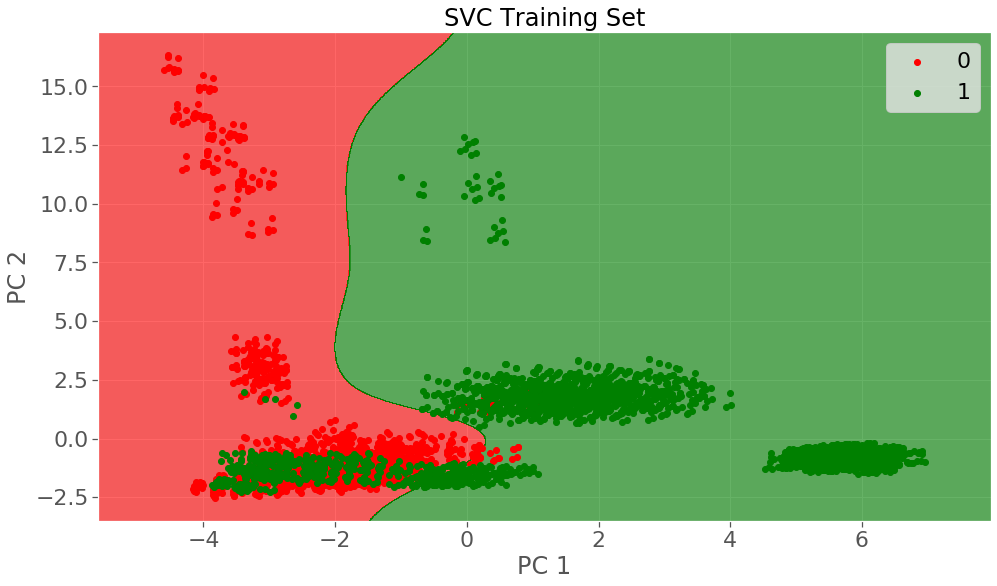

In [35]:
visualization_train('SVC')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


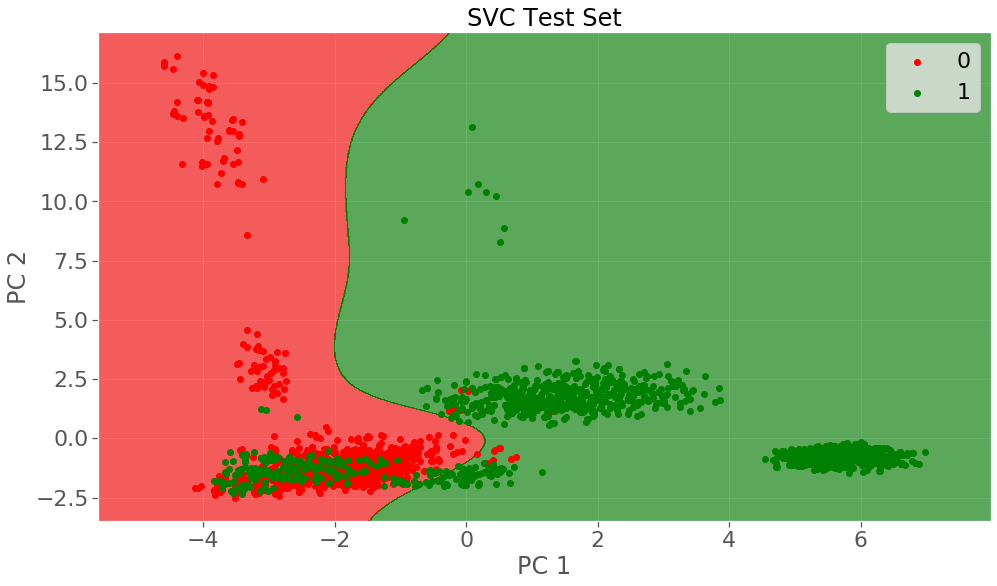

In [36]:
visualization_test('SVC')

# KNN


In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.97      0.92      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2861   90]
 [ 232 2503]]

Average Accuracy:	0.9312

Standard Deviation:	0.0096


In [39]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9307

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1211   46]
 [ 123 1058]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


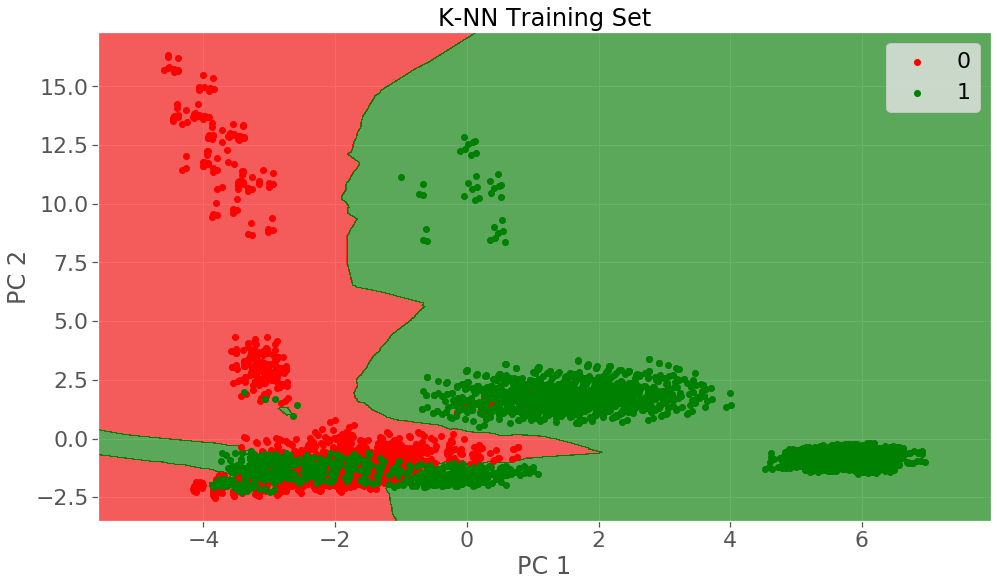

In [40]:
visualization_train('K-NN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


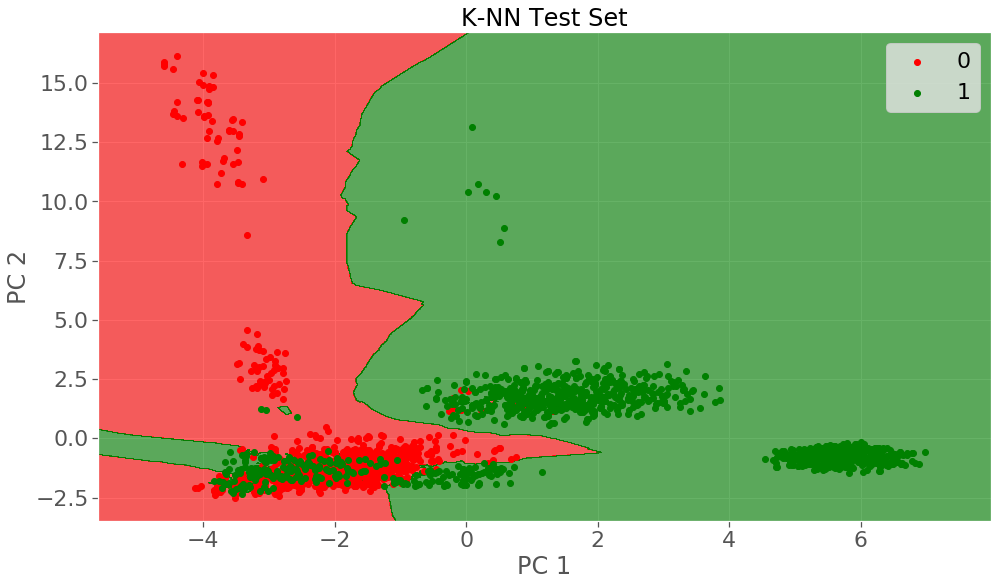

In [41]:
visualization_test('K-NN')

In [42]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2845  106]
 [ 474 2261]]

Average Accuracy:	0.8982

Standard Deviation:	0.0114


In [44]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1215   42]
 [ 210  971]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


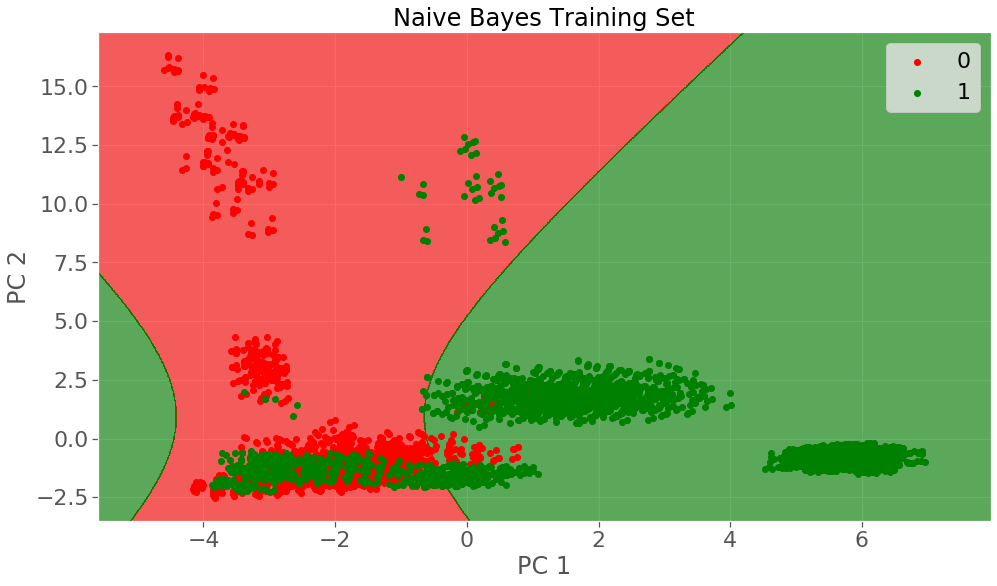

In [45]:
visualization_train('Naive Bayes')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


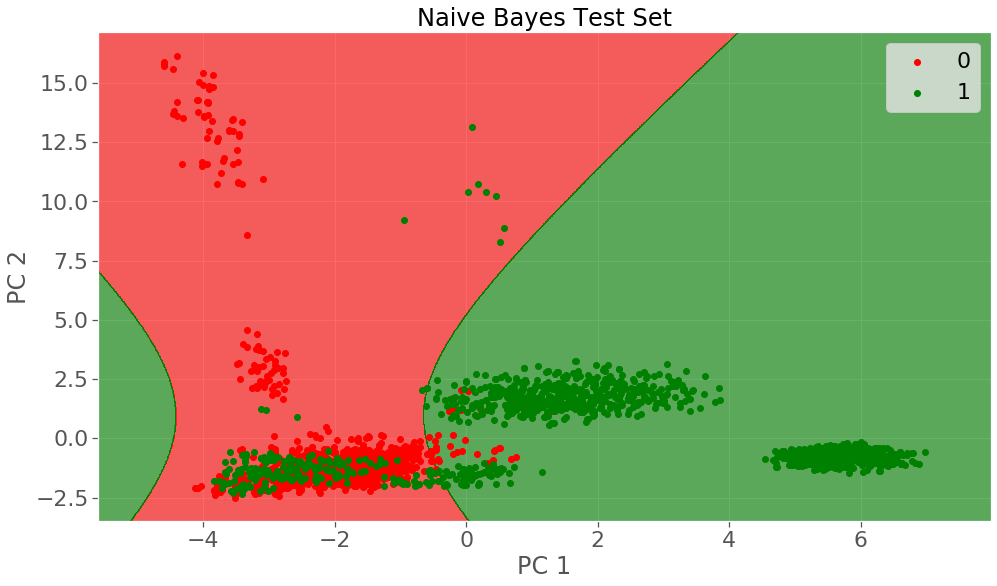

In [46]:
visualization_test('Naive Bayes')

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [48]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8938

Standard Deviation:	0.0116


In [49]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8987

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1257
           1       0.90      0.89      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1141  116]
 [ 131 1050]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


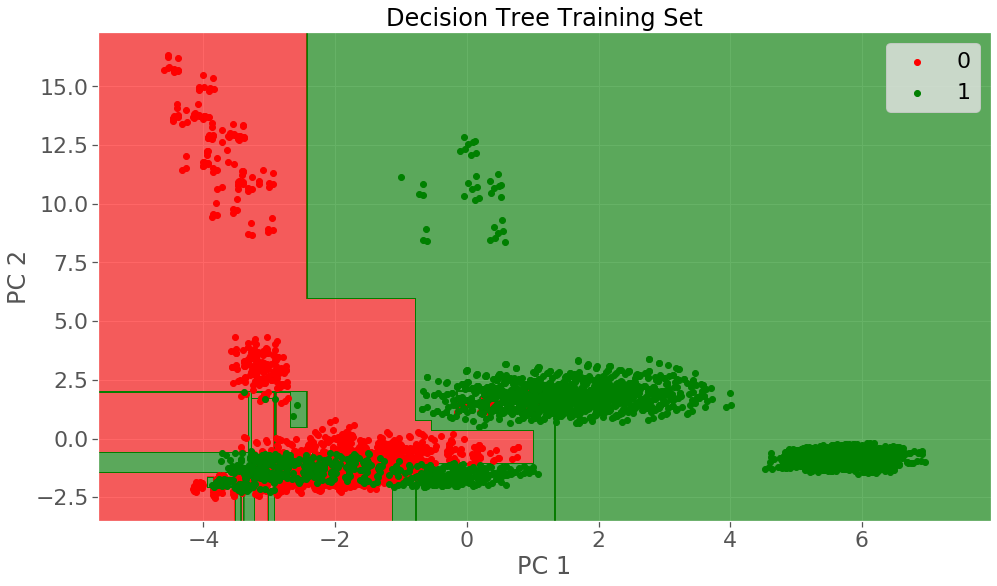

In [50]:
visualization_train('Decision Tree')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


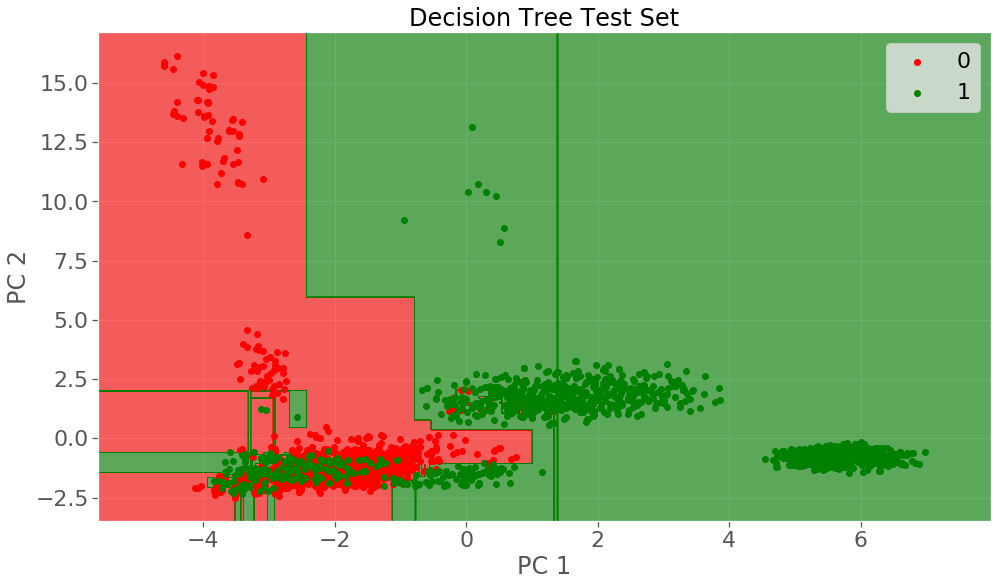

In [51]:
visualization_test('Decision Tree')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [53]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   5 2730]]

Average Accuracy:	0.9281

Standard Deviation:	0.0104


In [54]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9290

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1210   47]
 [ 126 1055]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


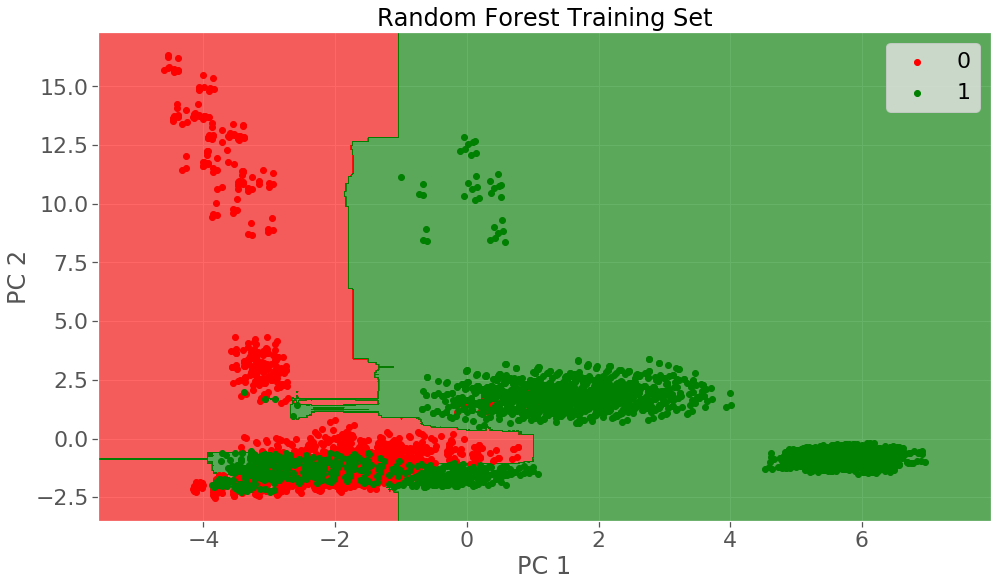

In [55]:
visualization_train('Random Forest')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


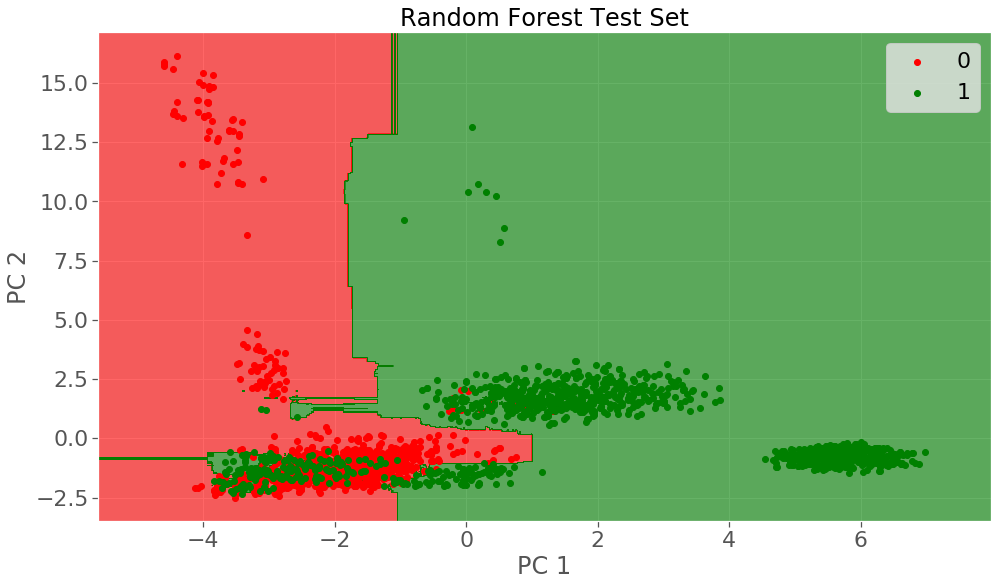

In [56]:
visualization_test('Random Forest')